# Importing The Required Libraries

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Reading Csv Files From Local Disk

In [36]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\project\\Capstone Project\\train data.csv")
y=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\project\\Capstone Project\\train labels.csv")

# Dropping Unwanted Columns

In [37]:
del x["id"],x["release"]

# Retaning Only 20% of the Null Values In the Columns

In [38]:
p=int(x.shape[0]*0.8)

In [39]:
p

11715

# Dropping The Null Values

In [40]:
x.dropna(axis=1,how="any",thresh=p,inplace=True)

# Imputing Null Values

In [41]:
for f in x.columns :
    if f.startswith("n_") or f.startswith("o_") :
        x[f].fillna(value=x[f].mean(),inplace=True)
    else :
        x[f].fillna(value=x[f].mode()[0],inplace=True)


# One Hot Encoding

In [42]:
x=pd.get_dummies(x,drop_first=True)

In [43]:
x.head()

,n_0002,n_0005,n_0019,n_0038,n_0047,n_0050,n_0052,n_0061,n_0067,n_0075,...,c_1259_w,c_1259_x,c_1259_y,c_1259_z,c_1286_b,c_1316_b,c_1348_b,c_1348_c,c_1348_d,c_1372_b
0,0.025449,0.368421,0.0,0.193548,1,1,1,1,0.928571,1,...,0,0,0,0,1,1,1,0,0,0
1,0.031297,0.315789,0.0,0.177419,1,1,1,1,0.928571,1,...,0,0,0,0,1,1,1,0,0,0
2,0.024475,0.342105,0.0,0.290323,1,1,1,1,0.428571,1,...,1,0,0,0,1,1,1,0,0,0
3,0.041694,0.447368,0.0,0.370968,1,1,1,1,0.571429,1,...,0,0,0,0,1,0,1,0,0,0
4,0.038120,0.315789,0.0,0.177419,1,1,1,1,0.928571,1,...,0,0,0,0,1,1,1,0,0,0


# Performing PCA

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [45]:
s=StandardScaler()

In [46]:
s1=s.fit_transform(x)

In [47]:
p=PCA(0.95)

In [49]:
p1=p.fit_transform(s1)

In [50]:
import matplotlib.pyplot as plt

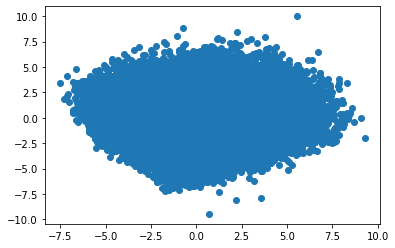

In [52]:
plt.scatter(p1[:,0],p1[:,1],cmap="prism")

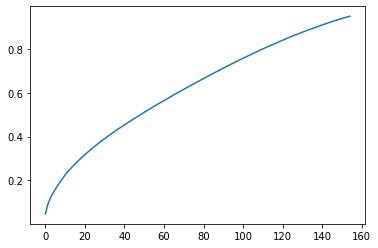

In [53]:
import numpy as np
plt.plot(np.cumsum(p.explained_variance_ratio_))

# Only Taken Important Features AFter Compressing Through Pca

In [55]:
x=x.iloc[:,0:159]

In [60]:
del y["id"]

In [61]:
x.head()

,n_0002,n_0005,n_0019,n_0038,n_0047,n_0050,n_0052,n_0061,n_0067,n_0075,...,c_1158_g,c_1158_h,c_1158_i,c_1158_j,c_1158_k,c_1186_b,c_1189_b,c_1210_b,c_1210_c,c_1210_d
0,0.025449,0.368421,0.0,0.193548,1,1,1,1,0.928571,1,...,1,0,0,0,0,0,1,0,1,0
1,0.031297,0.315789,0.0,0.177419,1,1,1,1,0.928571,1,...,1,0,0,0,0,0,1,0,1,0
2,0.024475,0.342105,0.0,0.290323,1,1,1,1,0.428571,1,...,0,0,0,1,0,0,1,0,1,0
3,0.041694,0.447368,0.0,0.370968,1,1,1,1,0.571429,1,...,0,0,0,0,0,0,1,0,1,0
4,0.038120,0.315789,0.0,0.177419,1,1,1,1,0.928571,1,...,0,0,0,0,0,0,1,0,1,0


In [62]:
y.head()

,service_a,service_b,service_c,service_d,service_e,service_f,service_g,service_h,service_i,service_j,service_k,service_l,service_m,service_n
0,1,1,0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,1,0,0,0,0,0,1,1,1,0


# Building The Model Using Binary Relevance With Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [67]:
dt=DecisionTreeClassifier()

In [68]:
dt.fit(x,y)

DecisionTreeClassifier()

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [70]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
pred=dt.predict(x_test)

In [72]:
from sklearn.metrics import zero_one_loss

In [85]:
print(zero_one_loss(y_test,pred))

0.891771935814271


# Model With Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf=RandomForestClassifier(n_estimators=500,max_depth=8,max_features="auto",max_leaf_nodes=20,random_state=123)

In [96]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=20, n_estimators=500,
                       random_state=123)

In [97]:
pred1=rf.predict(x_test)

In [98]:
print(zero_one_loss(y_test,pred1))

0.7931034482758621


# Model with Neural Networks

In [99]:
from sklearn.neural_network import MLPClassifier

In [124]:
m=MLPClassifier(activation="tanh",alpha=0.001,learning_rate_init=0.1,random_state=187)

In [125]:
m.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.001, learning_rate_init=0.1,
              random_state=187)

In [126]:
pred3=m.predict(x_test)

In [127]:
print(zero_one_loss(y_test,pred3))

0.9576647319904404
